In [71]:
# importing prepared data
import pandas as pd

df = pd.read_csv('../Data/cleaned_merged_data.csv')

# cleaning the dates
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date


# Exploratory Data Analysis

# 1. What are the Monthly Order Trends?

In [27]:
df['month_ordered'] = df['order_purchase_timestamp'].dt.month_name()

In [38]:
orders_by_month = df.pivot_table(index='month_ordered', values='order_id', aggfunc='count').reset_index()
orders_by_month = orders_by_month.rename(columns={'order_id': 'number_of_orders'})


In [39]:
orders_by_month

,month_ordered,number_of_orders
0,April,10956
1,August,12513
2,December,6415
3,February,9800
4,January,9316
5,July,12038
6,June,11082
7,March,11520
8,May,12458
9,November,8883


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

orders_by_month['month_ordered'] = pd.Categorical(orders_by_month['month_ordered'], categories=month_order, ordered=True)
orders_by_month = orders_by_month.sort_values('month_ordered')



In [108]:
sns.set_style("dark") 
plt.rcParams['axes.facecolor'] = 'black'      
plt.rcParams['figure.facecolor'] = 'black'    
plt.rcParams['axes.edgecolor'] = 'white'     
plt.rcParams['xtick.color'] = 'white'        
plt.rcParams['ytick.color'] = 'white'         
plt.rcParams['text.color'] = 'white'          
plt.rcParams['axes.labelcolor'] = 'white'  

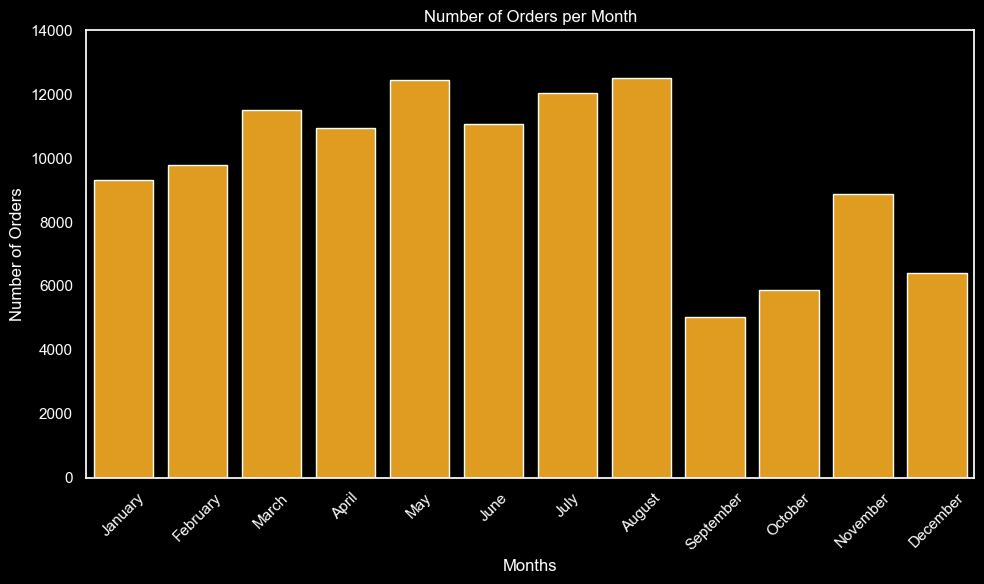

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(data=orders_by_month, x='month_ordered', y='number_of_orders', color='Orange')

legend = plt.gca().get_legend()
if legend:
    legend.remove()

sns.set_theme(style='ticks')
plt.title('Number of Orders per Month')
plt.xlabel('Months')
plt.ylim(0, 14000)
plt.ylabel('Number of Orders')
plt.xticks(rotation=45) 
plt.tight_layout()       

plt.show()

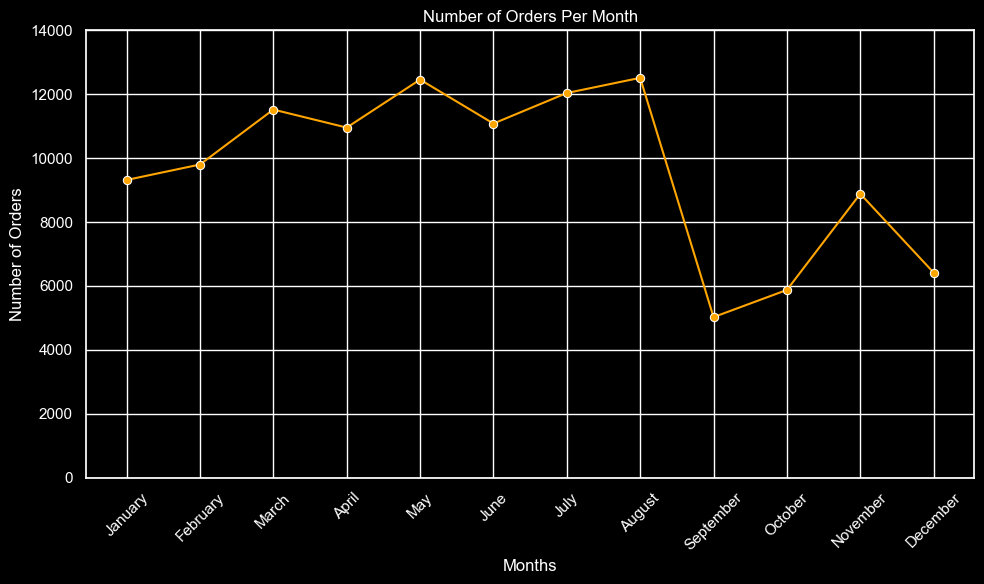

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=orders_by_month, x='month_ordered', y='number_of_orders', marker='o', color='orange')

plt.title('Number of Orders Per Month')
plt.xlabel('Months')
plt.ylim(0, 14000)
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Number of Orders per product category



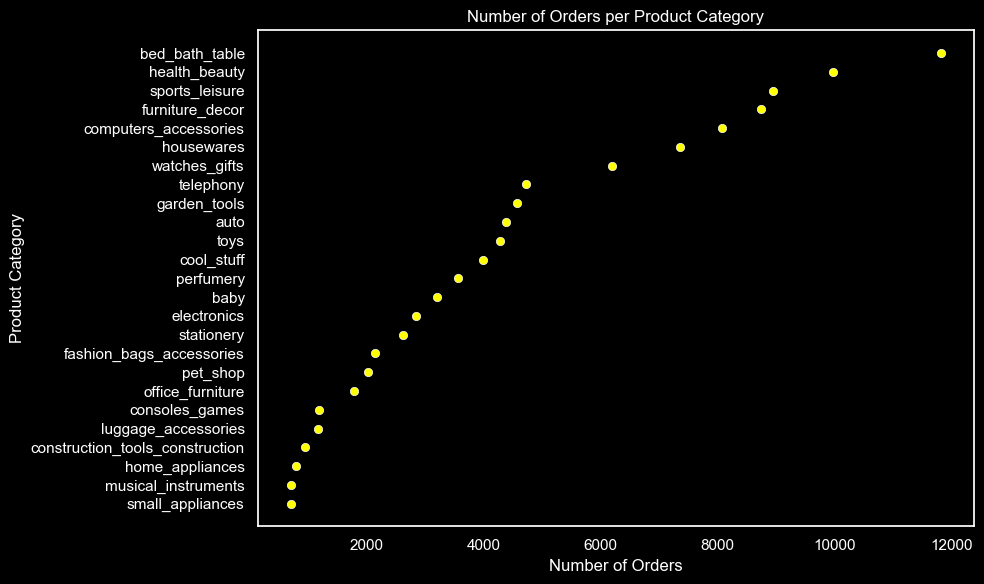

In [232]:
orders_by_category = df.pivot_table(index='product_category_name_english', values='order_id', aggfunc='count').reset_index()
orders_by_category = orders_by_category.rename(columns={'order_id': 'number_of_orders', 'product_category_name_english': 'product_category'})
orders_by_category.sort_values('number_of_orders', ascending=False, inplace=True)

plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='number_of_orders', y='product_category',color='yellow', data=orders_by_category.head(25))
plt.title('Number of Orders per Product Category')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# 20 Best Selling Product Categories

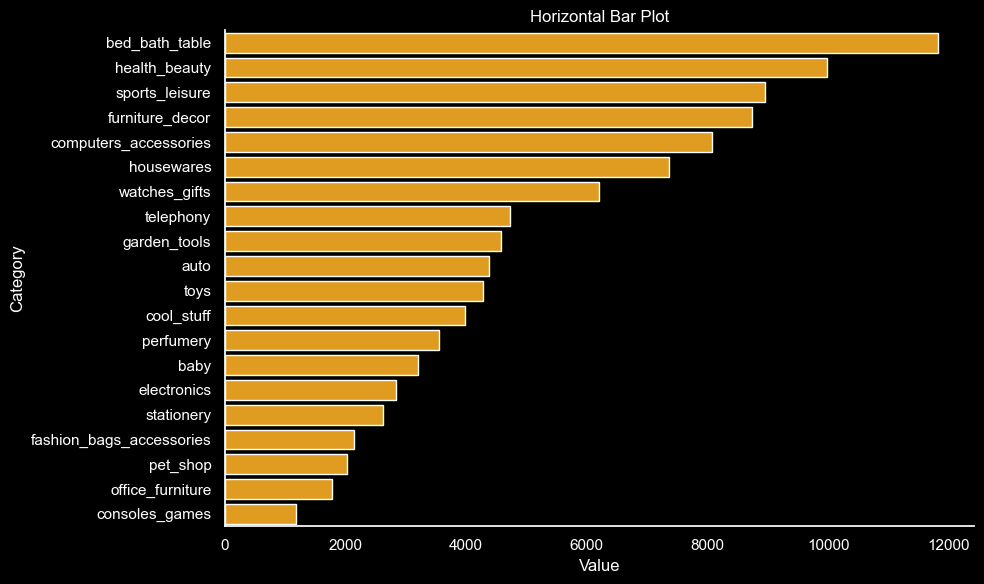

In [ ]:
Top_20 = orders_by_category.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=Top_20, x='number_of_orders', y='product_category', color='orange')  

# Customize
plt.title('20 Best Selling Product Categories')
sns.despine()
plt.xlabel('Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 3. Average Order Value of Top 10 most selling categories?

In [102]:
category_aov = df.groupby('product_category_name_english').agg({
    'price': 'sum',          
    'order_id': 'nunique'     
}).reset_index()

category_aov['avg_order_value'] = category_aov['price'] / category_aov['order_id']
category_aov = category_aov.rename(columns={'order_id': 'number_of_orders', 'product_category_name_english': 'product_category', 'price': 'total_category_revenue'})
category_aov.sort_values('avg_order_value', inplace=True, ascending=False)
category_aov

,product_category,total_category_revenue,number_of_orders,avg_order_value
14,computers,242811.61,181,1341.500608
64,small_appliances_home_oven_and_coffee,48945.71,75,652.609467
45,home_appliances_2,123265.31,234,526.774829
0,agro_industry_and_commerce,83841.95,182,460.670055
56,musical_instruments,210928.73,628,335.873774
...,...,...,...,...
26,electronics,166779.21,2550,65.403612
11,cds_dvds_musicals,730.00,12,60.833333
23,diapers_and_hygiene,1567.59,27,58.058889
35,flowers,1110.04,29,38.277241


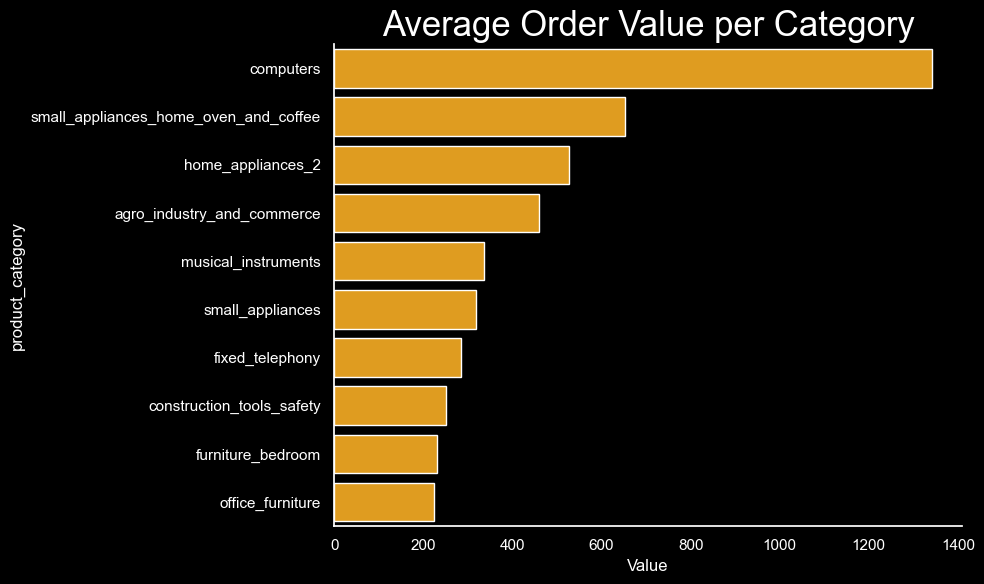

In [224]:
Top_10_Categories_by_aov = category_aov.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=Top_10_Categories_by_aov, x='avg_order_value', y='product_category', color='orange')  

# Customize
plt.title('Average Order Value per Category', fontsize=25)
sns.despine()
plt.xlabel('Value')
plt.tight_layout()
plt.show()

# 4. Which categories generate the most revenue?


In [110]:
category_revenue = category_aov.copy()

category_revenue.sort_values('total_category_revenue', inplace=True, ascending=False)
category_revenue

,product_category,total_category_revenue,number_of_orders,avg_order_value
43,health_beauty,1297355.80,8835,146.842762
70,watches_gifts,1253143.30,5624,222.820644
7,bed_bath_table,1092551.02,9417,116.019010
65,sports_leisure,1023996.34,7720,132.642013
15,computers_accessories,942277.57,6689,140.869722
...,...,...,...,...
35,flowers,1110.04,29,38.277241
46,home_comfort_2,773.17,24,32.215417
11,cds_dvds_musicals,730.00,12,60.833333
29,fashion_childrens_clothes,569.85,8,71.231250


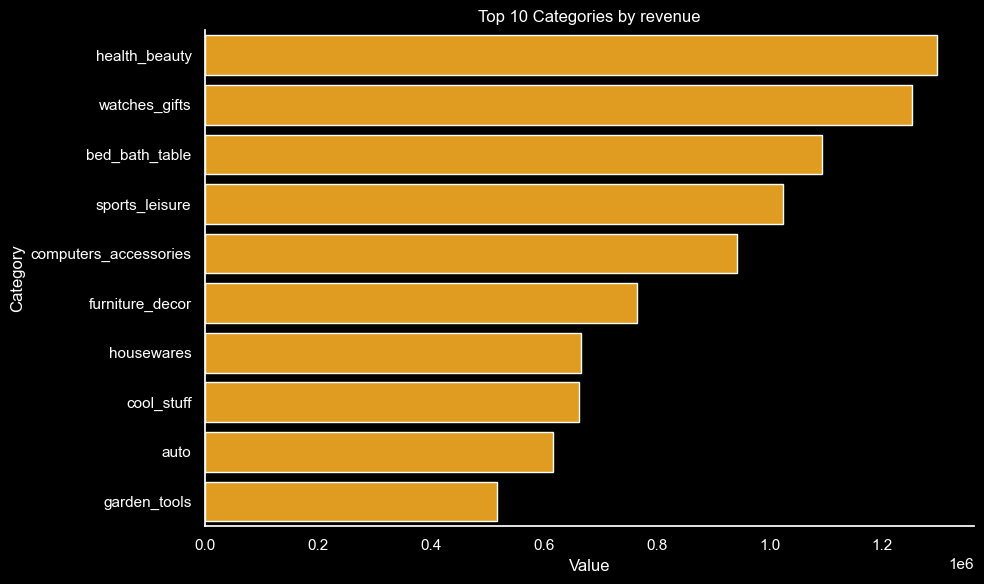

In [111]:
Top_10_Categories_by_revenue = category_revenue.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=Top_10_Categories_by_revenue, x='total_category_revenue', y='product_category', color='orange')  

# Customize
plt.title('Top 10 Categories by revenue')
sns.despine()
plt.xlabel('Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 5. Avg Delivery Time per State

In [ ]:
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
state_delivery = df.groupby('customer_state').agg({
    'delivery_time': 'mean',
    'order_id': 'nunique'
}).reset_index()
state_delivery = state_delivery.sort_values(by='delivery_time', ascending=False)
state_delivery = state_delivery.rename(columns={'order_id': 'number_of_orders'})



Correlation between delivery time and number of orders: -0.583


,customer_state,delivery_time,number_of_orders
21,RR,27.863636,44
3,AP,27.662651,68
2,AM,26.053892,146
1,AL,24.084668,407
13,PA,23.268224,951
9,MA,21.297899,730
24,SE,20.919271,343
5,CE,20.266352,1312
14,PB,20.203583,523
0,AC,20.152174,79


Index(['id', 'name', 'sigla', 'regiao_id', 'codigo_ibg', 'cartodb_id',
       'created_at', 'updated_at', 'geometry'],
      dtype='object')


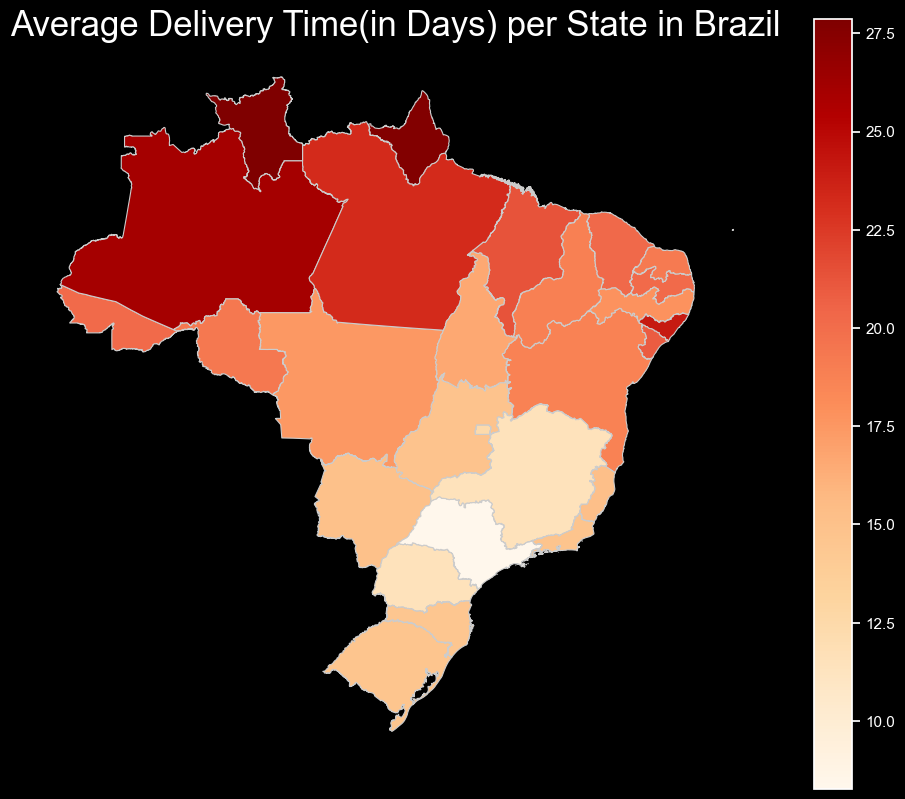

In [223]:
import geopandas as gpd

brazil_states = gpd.read_file('../Data/brazil-states.geojson')  # or .shp file

# Preview the column with state abbreviations (e.g., 'sigla' or 'uf')
print(brazil_states.columns)
merged_geo = brazil_states.merge(state_delivery, left_on='sigla', right_on='customer_state')


fig, ax = plt.subplots(figsize=(12, 10))
merged_geo.plot(column='delivery_time',
                cmap='OrRd',
                linewidth=0.8,
                edgecolor='0.8',
                legend=True,
                ax=ax)

plt.title('Average Delivery Time(in Days) per State in Brazil', fontsize=25)
plt.axis('off')
plt.show()

# 6. Correlation Between Delivery Time & Number of orders per State

Correlation between delivery time and number of orders: -0.583


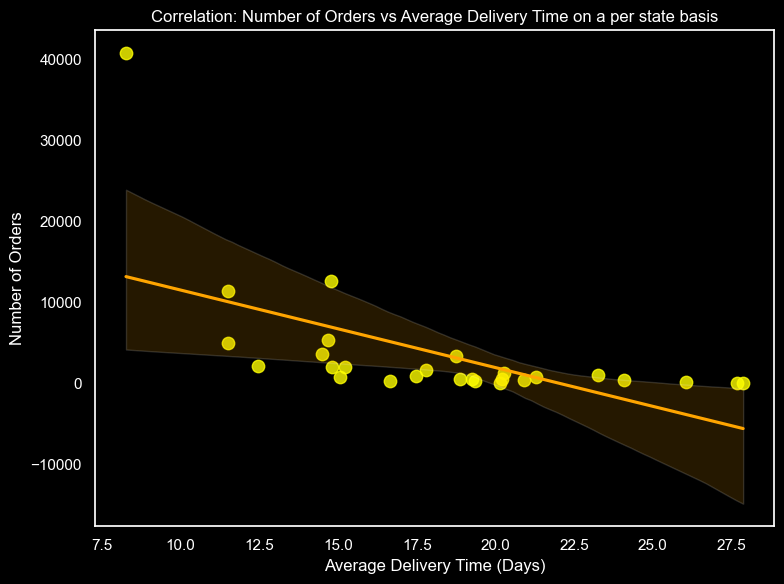

In [234]:
correlation = state_delivery['delivery_time'].corr(state_delivery['number_of_orders'])
print(f'Correlation between delivery time and number of orders: {correlation:.3f}')

plt.figure(figsize=(8, 6))
sns.regplot(data=state_delivery, x='delivery_time', y='number_of_orders', marker='o', scatter_kws={'s': 80, 'color': 'yellow'}, line_kws={"color": "orange"})
plt.title('Correlation: Number of Orders vs Average Delivery Time on a per state basis')
plt.xlabel('Average Delivery Time (Days)')

plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# 7. Top 3 States (as per order order volume) and their Top 5 Product Categories

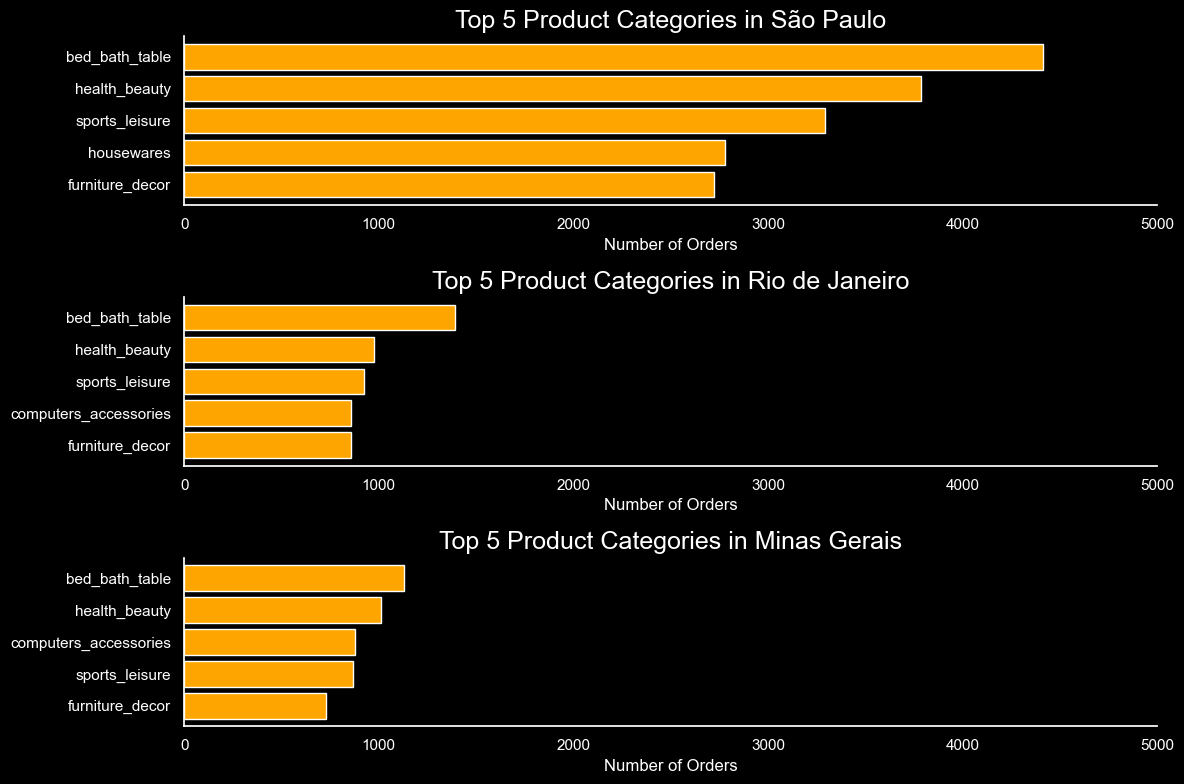

In [221]:
state_and_category = df.groupby(['product_category_name_english','customer_state']).agg({
    'price': 'sum',          
    'order_id': 'nunique'     
}).reset_index()

state_and_category = state_and_category.rename(columns={'order_id': 'number_of_orders', 'product_category_name_english': 'product_category', 'price': 'revenue'})

# Top 3 state as per order value
# state_and_category.sort_values(by='number_of_orders', ascending=False)['customer_state'].tolist()[:3]
Top_3_state = ['SP', 'RJ', 'MG']

Top_3_state_titles = ['São Paulo', 'Rio de Janeiro', 'Minas Gerais']

state_and_category_pivot = state_and_category.pivot_table(index='customer_state', columns='product_category',values='number_of_orders' ,aggfunc='sum', fill_value=0)
# state_and_category_pivot
state_and_category_pivot.loc[Top_3_state]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))  

# Flatten the 2D array of axes for easier looping
ax = ax.flatten()
sns.despine()
for i in range(3):
    Top_5_products = state_and_category_pivot.loc[Top_3_state[i]].sort_values(ascending=False).head().to_frame('number_of_orders').reset_index()
    
    ax[i].barh(
        Top_5_products['product_category'][::-1], 
        Top_5_products['number_of_orders'][::-1],
        color='orange'
    )

    
    ax[i].set_title(f"Top 5 Product Categories in {Top_3_state_titles[i]}", fontsize=18)
    ax[i].set_xlabel("Number of Orders")
    ax[i].set_xlim(0, 5000)
    
plt.tight_layout()
plt.show()